# 🚗 Análisis Comparativo: Radix Sort vs Merge Sort
## Optimización de Consultas de Placas Vehiculares Ecuatorianas

---

**Universidad Nacional de Chimborazo**  
**Facultad de Ingeniería**  
**Carrera de Ciencia de Datos e Inteligencia Artificial**  
**Asignatura: Estructura de Datos**  
**Periodo Académico: Octubre 2025 – Febrero 2026**

---

### Autores:
- Juan David Ruiz Jara
- Ian Nolivos
- Kléver Castillo
- Estefany Condor
- Natasha Nuñez
- Elmer Rivadeneira

### Personal Académico:
- **Director de Carrera:** Mg. Milton López Ramos
- **Profesora de Asignatura:** Ing. Evelyn Rosero

---

## 📋 Estructura del Proyecto

Este proyecto sigue una arquitectura modular profesional:

```
proyecto_placas_ecuador/
├── main.py                 # Punto de entrada principal
├── app/
│   ├── __init__.py         # Inicializador del paquete
│   ├── exceptions.py       # Excepciones personalizadas
│   ├── io.py               # Funciones de entrada/salida
│   ├── cleaning.py         # Limpieza y validación de datos
│   ├── sorting.py          # Algoritmos de ordenamiento
│   ├── analysis.py         # Análisis con Pandas
│   ├── report.py           # Generación de reportes
│   └── pipeline.py         # Orquestación del flujo
├── data/
│   ├── raw.csv             # Datos originales
│   ├── processed.csv       # Datos procesados
│   └── report.txt          # Reporte generado
└── notebooks/
    └── analisis_completo.ipynb  # Este notebook
```

## 1. Configuración Inicial e Importaciones

In [6]:
# Agregar el directorio raíz del proyecto al path
import sys
import os
sys.path.insert(0, os.path.dirname(os.getcwd()))

# Importar el paquete app completo
from app import (
    # Excepciones
    PlacasDataError, DataReadError, SchemaError, TransformError,
    
    # I/O
    read_csv, save_csv, load_or_create_sample_data,
    
    # Limpieza
    validate_schema, convert_types, remove_duplicates, handle_missing_values,
    
    # Ordenamiento
    merge_sort, radix_sort, run_sorting_benchmark, verify_sorting_correctness,
    
    # Análisis
    get_dataset_summary, analyze_estados_ant, analyze_temporal,
    analyze_frecuencia_placas, identify_alertas, create_features,
    
    # Pipeline
    run_full_pipeline
)

# Librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

# Configuración
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

print("✅ Configuración completada")

✅ Configuración completada


## 2. Carga de Datos

In [7]:
# Cargar el dataset
df = read_csv('../data/raw.csv')

print(f"📊 Dataset cargado:")
print(f"   - Filas: {len(df):,}")
print(f"   - Columnas: {len(df.columns)}")
df.head(10)

📂 Leyendo archivo: ../data/raw.csv
✅ Archivo leído exitosamente: 1000 filas, 6 columnas
📋 Operación de lectura finalizada
📊 Dataset cargado:
   - Filas: 1,000
   - Columnas: 6


,id,placa,fecha_registro,estado_ANT,ubicacion_camara,peaje_ciudad
0,1,GQK-0569,2021-03-07 18:14:32,Habilitada,Quito,Peaje Oyacoto
1,2,HLR-5369,2025-10-15 05:41:34,Habilitada,Guayaquil,Peaje Yaguachi
2,3,JRF-8042,2020-06-12 17:01:21,Habilitada,Santo Domingo,Peaje Santo Domingo
3,4,TRK-1618,2020-10-31 08:50:35,Habilitada,Guayaquil,Peaje Chivería
4,5,UUB-2048,2021-11-09 08:13:52,Habilitada,Quito,Peaje Oyacoto
5,6,BJV-3378,2021-02-04 09:19:26,Habilitada,Ambato,Peaje San Andrés
6,7,ILW-1906,2020-08-19 07:40:09,Habilitada,Quito,Peaje Oyacoto
7,8,PWR-7099,2023-10-06 21:13:24,Habilitada,Cuenca,Peaje Chaquilcay
8,9,LUI-5437,2021-12-13 23:12:41,Habilitada,Quito,Peaje Rumiñahui
9,10,TUM-7031,2020-12-12 01:13:17,Habilitada,Ambato,Peaje San Andrés


## 3. Módulo de Excepciones Personalizadas

El archivo `app/exceptions.py` define excepciones específicas del dominio para un manejo robusto de errores.

In [8]:
# Demostración de excepciones personalizadas
print("📌 DEMOSTRACIÓN DE EXCEPCIONES PERSONALIZADAS")
print("="*60)

# Ejemplo 1: DataReadError
try:
    raise DataReadError(
        "Archivo no encontrado",
        filepath="archivo_inexistente.csv"
    )
except PlacasDataError as e:
    print(f"\n❌ DataReadError capturado:")
    print(f"   Mensaje: {e.message}")
    print(f"   Detalles: {e.details}")

# Ejemplo 2: SchemaError
try:
    raise SchemaError(
        "Columnas faltantes en el dataset",
        missing_columns=['placa', 'estado_ANT']
    )
except PlacasDataError as e:
    print(f"\n❌ SchemaError capturado:")
    print(f"   Mensaje: {e.message}")
    print(f"   Detalles: {e.details}")

print("\n✅ Todas las excepciones fueron capturadas correctamente")

📌 DEMOSTRACIÓN DE EXCEPCIONES PERSONALIZADAS

❌ DataReadError capturado:
   Mensaje: Archivo no encontrado
   Detalles: {'filepath': 'archivo_inexistente.csv'}

❌ SchemaError capturado:
   Mensaje: Columnas faltantes en el dataset
   Detalles: {'columnas_faltantes': ['placa', 'estado_ANT']}

✅ Todas las excepciones fueron capturadas correctamente


## 4. Pipeline de Limpieza de Datos

El módulo `app/cleaning.py` implementa las funciones de validación y limpieza.

In [9]:
# Ejecutar pipeline de limpieza paso a paso
print("🧹 EJECUTANDO PIPELINE DE LIMPIEZA")
print("="*60)

# Paso 1: Validar esquema
print("\n📌 Paso 1: Validación de esquema")
validate_schema(df)

# Paso 2: Convertir tipos
print("\n📌 Paso 2: Conversión de tipos")
df_converted = convert_types(df)

# Paso 3: Eliminar duplicados
print("\n📌 Paso 3: Eliminación de duplicados")
df_no_dups, n_duplicados = remove_duplicates(df_converted)

# Paso 4: Manejar nulos
print("\n📌 Paso 4: Manejo de valores faltantes")
df_clean, imputation_report = handle_missing_values(df_no_dups)

# Paso 5: Crear features
print("\n📌 Paso 5: Feature Engineering")
df_features = create_features(df_clean)

print("\n✅ Pipeline de limpieza completado")
print(f"   Filas: {len(df)} → {len(df_features)}")
print(f"   Columnas: {len(df.columns)} → {len(df_features.columns)}")

🧹 EJECUTANDO PIPELINE DE LIMPIEZA

📌 Paso 1: Validación de esquema
🔍 Validando esquema del dataset...
✅ Esquema válido: 6 columnas verificadas
   Columnas encontradas: ['id', 'placa', 'fecha_registro', 'estado_ANT', 'ubicacion_camara', 'peaje_ciudad']

📌 Paso 2: Conversión de tipos
🔄 Convirtiendo tipos de datos...
✅ Conversión de tipos completada
   • id: {'tipo': 'numeric', 'valores_convertidos_a_nulo': np.int64(0)}
   • placa: {'tipo': 'string', 'limpieza': 'strip+upper'}
   • fecha_registro: {'tipo': 'datetime', 'valores_convertidos_a_nulo': np.int64(0)}
   • estado_ANT: {'tipo': 'string', 'limpieza': 'strip'}
   • ubicacion_camara: {'tipo': 'string', 'limpieza': 'strip'}
   • peaje_ciudad: {'tipo': 'string', 'limpieza': 'strip'}

📌 Paso 3: Eliminación de duplicados
🧹 Eliminando duplicados...
✅ Duplicados eliminados: 0
   Filas antes: 1000, Filas después: 1000

📌 Paso 4: Manejo de valores faltantes
🔧 Manejando valores faltantes...
✅ Valores faltantes manejados
   Nulos antes: 0, Nul

## 5. Implementación de Algoritmos de Ordenamiento

### 5.1 Merge Sort

**Teoría:** Algoritmo de divide y vencerás inventado por John von Neumann (1945).
- **Complejidad temporal:** O(n log n) en todos los casos
- **Complejidad espacial:** O(n)

In [10]:
# Preparar datos para ordenamiento
placas_unicas = df_features['placa'].unique().tolist()
data_to_sort = [{'placa': p} for p in placas_unicas]

print(f"📊 Datos preparados: {len(data_to_sort)} placas únicas")

# Ejecutar Merge Sort
print("\n🔄 Ejecutando Merge Sort...")
sorted_merge, metrics_merge = merge_sort(data_to_sort.copy())

print(f"\n📈 Resultados Merge Sort:")
print(f"   - Comparaciones: {metrics_merge['comparisons']:,}")
print(f"   - Llamadas recursivas: {metrics_merge['recursive_calls']:,}")
print(f"   - Tiempo de ejecución: {metrics_merge['execution_time_ms']:.4f} ms")

print(f"\n📋 Primeras 10 placas ordenadas:")
for i, item in enumerate(sorted_merge[:10], 1):
    print(f"   {i}. {item['placa']}")

📊 Datos preparados: 489 placas únicas

🔄 Ejecutando Merge Sort...

📈 Resultados Merge Sort:
   - Comparaciones: 3,761
   - Llamadas recursivas: 977
   - Tiempo de ejecución: 3.1235 ms

📋 Primeras 10 placas ordenadas:
   1. AAL-5699
   2. ABH-7849
   3. ABM-2548
   4. ACE-1986
   5. ACM-4169
   6. AED-5188
   7. AEF-1793
   8. AEN-1298
   9. AGQ-6891
   10. AHM-6477


### 5.2 Radix Sort

**Teoría:** Algoritmo que ordena procesando cada dígito/carácter de forma individual.
- **Complejidad temporal:** O(d·(n+k)) donde d=dígitos, k=rango
- **Complejidad espacial:** O(n+k)

In [11]:
# Ejecutar Radix Sort
print("🔄 Ejecutando Radix Sort...")
sorted_radix, metrics_radix = radix_sort(data_to_sort.copy())

print(f"\n📈 Resultados Radix Sort:")
print(f"   - Operaciones: {metrics_radix['operations']:,}")
print(f"   - Pasadas (d): {metrics_radix['passes']}")
print(f"   - Buckets usados (k): {metrics_radix['buckets_used']}")
print(f"   - Tiempo de ejecución: {metrics_radix['execution_time_ms']:.4f} ms")

print(f"\n📋 Primeras 10 placas ordenadas:")
for i, item in enumerate(sorted_radix[:10], 1):
    print(f"   {i}. {item['placa']}")

🔄 Ejecutando Radix Sort...

📈 Resultados Radix Sort:
   - Operaciones: 6,846
   - Pasadas (d): 7
   - Buckets usados (k): 37
   - Tiempo de ejecución: 5.5674 ms

📋 Primeras 10 placas ordenadas:
   1. AAL-5699
   2. ABH-7849
   3. ABM-2548
   4. ACE-1986
   5. ACM-4169
   6. AED-5188
   7. AEF-1793
   8. AEN-1298
   9. AGQ-6891
   10. AHM-6477


### 5.3 Verificación de Correctitud

In [12]:
# Verificar que ambos algoritmos producen el mismo resultado
verification = verify_sorting_correctness(data_to_sort)

if verification:
    print("✅ Verificación exitosa: ambos algoritmos producen el mismo orden")
else:
    print("❌ Los resultados difieren")


🔍 Verificando correctitud de algoritmos...
✅ VERIFICACIÓN EXITOSA: Ambos algoritmos producen el mismo orden
✅ Verificación exitosa: ambos algoritmos producen el mismo orden


## 6. Benchmark Comparativo (Pruebas de Estrés)

In [13]:
# Ejecutar benchmark con múltiples iteraciones
N_ITERATIONS = 10

benchmark_results = run_sorting_benchmark(data_to_sort, n_iterations=N_ITERATIONS)

🏁 EJECUTANDO BENCHMARK DE ALGORITMOS DE ORDENAMIENTO
📊 Configuración:
   - Elementos a ordenar: 489
   - Iteraciones por algoritmo: 10

🔄 Ejecutando 10 iteraciones de Merge Sort...
   Iteración  1: 3.6039 ms
   Iteración  2: 3.3715 ms
   Iteración  3: 3.2311 ms
   Iteración  4: 3.6391 ms
   Iteración  5: 6.9538 ms
   Iteración  6: 3.4272 ms
   Iteración  7: 4.2949 ms
   Iteración  8: 3.0837 ms
   Iteración  9: 2.9647 ms
   Iteración 10: 3.0554 ms

🔄 Ejecutando 10 iteraciones de Radix Sort...
   Iteración  1: 7.7572 ms
   Iteración  2: 6.2307 ms
   Iteración  3: 5.1736 ms
   Iteración  4: 7.7960 ms
   Iteración  5: 5.7624 ms
   Iteración  6: 6.9968 ms
   Iteración  7: 5.2492 ms
   Iteración  8: 9.0325 ms
   Iteración  9: 5.3745 ms
   Iteración 10: 7.5819 ms


In [14]:
# Crear tabla comparativa con Pandas
tabla_comparativa = pd.DataFrame({
    'Métrica': [
        'Tiempo Promedio (ms)',
        'Desviación Estándar (ms)',
        'Tiempo Mínimo (ms)',
        'Tiempo Máximo (ms)',
        'Operaciones Promedio'
    ],
    'Merge Sort': [
        f"{benchmark_results['merge_sort']['avg_time']:.4f}",
        f"{benchmark_results['merge_sort']['std_time']:.4f}",
        f"{benchmark_results['merge_sort']['min_time']:.4f}",
        f"{benchmark_results['merge_sort']['max_time']:.4f}",
        f"{benchmark_results['merge_sort']['avg_comparisons']:,.0f}"
    ],
    'Radix Sort': [
        f"{benchmark_results['radix_sort']['avg_time']:.4f}",
        f"{benchmark_results['radix_sort']['std_time']:.4f}",
        f"{benchmark_results['radix_sort']['min_time']:.4f}",
        f"{benchmark_results['radix_sort']['max_time']:.4f}",
        f"{benchmark_results['radix_sort']['avg_operations']:,.0f}"
    ]
})

print("📊 TABLA COMPARATIVA DE RENDIMIENTO")
print("="*60)
tabla_comparativa

📊 TABLA COMPARATIVA DE RENDIMIENTO


,Métrica,Merge Sort,Radix Sort
0,Tiempo Promedio (ms),3.7625,6.6955
1,Desviación Estándar (ms),1.1249,1.2616
2,Tiempo Mínimo (ms),2.9647,5.1736
3,Tiempo Máximo (ms),6.9538,9.0325
4,Operaciones Promedio,"3,761","6,846"


In [15]:
# Resultado del benchmark
print(f"\n🏆 RESULTADO FINAL")
print(f"="*60)
print(f"   Algoritmo ganador: {benchmark_results['winner']}")
print(f"   Diferencia de tiempo: {benchmark_results['time_difference_ms']:.4f} ms")
print(f"   Porcentaje más rápido: {benchmark_results['percentage_faster']:.2f}%")


🏆 RESULTADO FINAL
   Algoritmo ganador: Merge Sort
   Diferencia de tiempo: 2.9330 ms
   Porcentaje más rápido: 43.80%


## 7. Análisis Exploratorio con Pandas

**JUSTIFICACIÓN DEL USO DE PANDAS:**
- Operaciones vectorizadas eficientes
- Funciones de agregación optimizadas (groupby, value_counts)
- Manejo elegante de datos faltantes
- Integración con visualización

In [16]:
# Análisis de estados ANT
print("📊 ANÁLISIS DE ESTADOS ANT")
estados = analyze_estados_ant(df_features)
estados

📊 ANÁLISIS DE ESTADOS ANT
📊 Analizando distribución de estados ANT...
✅ Análisis completado: 3 estados encontrados


,estado_ANT,cantidad,porcentaje
0,Habilitada,902,90.2
1,Suspendida,55,5.5
2,Bloqueada,43,4.3


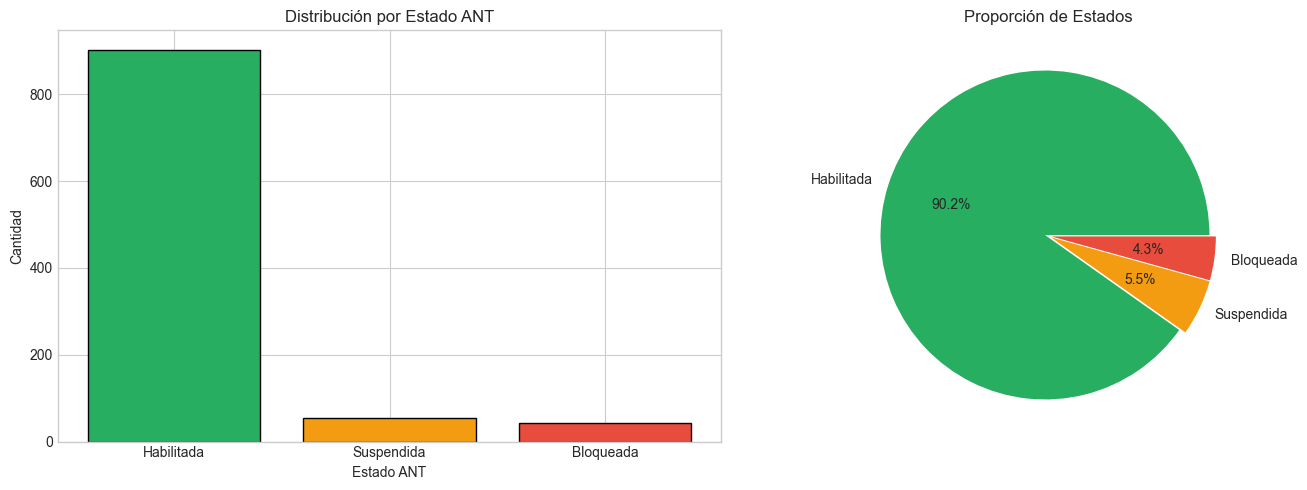

In [17]:
# Visualización de estados ANT
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colores = {'Habilitada': '#27ae60', 'Suspendida': '#f39c12', 'Bloqueada': '#e74c3c'}
colors = [colores.get(x, '#95a5a6') for x in estados['estado_ANT']]

axes[0].bar(estados['estado_ANT'], estados['cantidad'], color=colors, edgecolor='black')
axes[0].set_xlabel('Estado ANT')
axes[0].set_ylabel('Cantidad')
axes[0].set_title('Distribución por Estado ANT')

axes[1].pie(estados['cantidad'], labels=estados['estado_ANT'], autopct='%1.1f%%',
            colors=colors, explode=[0.02]*len(estados))
axes[1].set_title('Proporción de Estados')

plt.tight_layout()
plt.show()

📊 Realizando análisis temporal...
✅ Análisis temporal completado


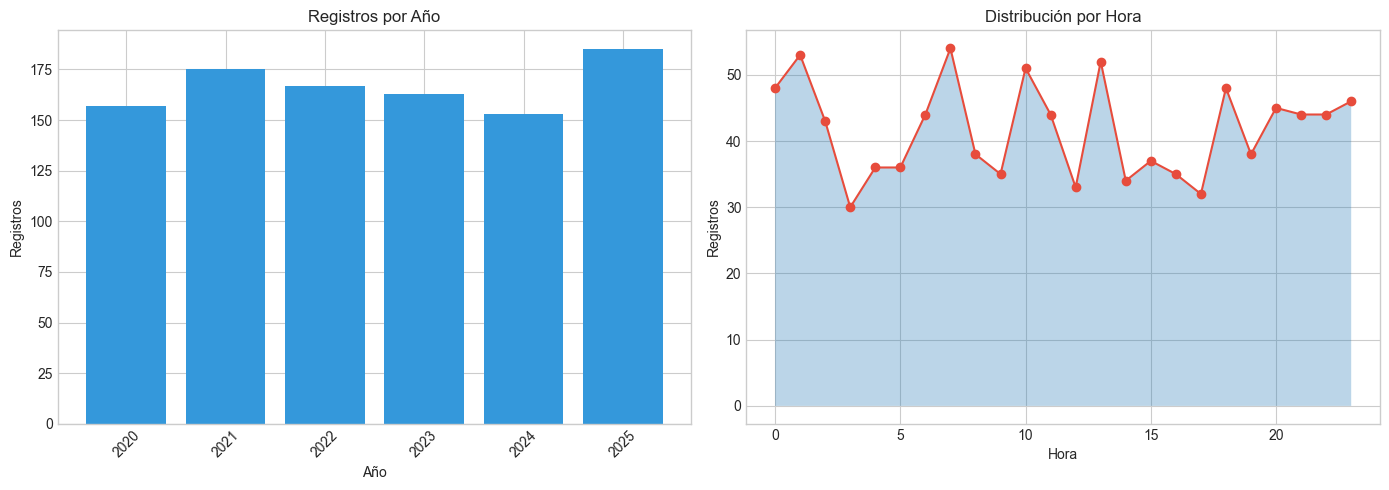

In [18]:
# Análisis temporal
temporal = analyze_temporal(df_features)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(temporal['por_año']['año'].astype(str), temporal['por_año']['registros'], color='#3498db')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Registros')
axes[0].set_title('Registros por Año')
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(temporal['por_hora']['hora'], temporal['por_hora']['registros'], 'o-', color='#e74c3c')
axes[1].fill_between(temporal['por_hora']['hora'], temporal['por_hora']['registros'], alpha=0.3)
axes[1].set_xlabel('Hora')
axes[1].set_ylabel('Registros')
axes[1].set_title('Distribución por Hora')

plt.tight_layout()
plt.show()

In [19]:
# Análisis de alertas
alertas = identify_alertas(df_features)

print(f"\n🚨 ANÁLISIS DE ALERTAS")
print(f"="*60)
print(f"   Total registros con alerta: {alertas['total_alertas']:,}")
print(f"   Placas únicas con alerta: {alertas['placas_con_alertas']:,}")
print(f"\n   Por estado:")
for estado, cantidad in alertas['por_estado'].items():
    print(f"   • {estado}: {cantidad:,}")

print(f"\n📋 Top 10 placas con más alertas:")
alertas['detalle'].head(10)

🚨 Identificando vehículos con alertas...
✅ Alertas identificadas: 98 registros, 92 placas únicas

🚨 ANÁLISIS DE ALERTAS
   Total registros con alerta: 98
   Placas únicas con alerta: 92

   Por estado:
   • Suspendida: 55
   • Bloqueada: 43

📋 Top 10 placas con más alertas:


,placa,estado_ANT,num_detecciones,primera_deteccion,ultima_deteccion,ubicaciones
10,BNY-8327,Suspendida,2,2022-09-26 20:35:51,2022-12-23 03:54:38,"Manta, Guayaquil"
13,BXQ-6157,Bloqueada,2,2022-03-05 18:06:11,2023-12-05 23:31:26,Manta
50,IRD-0053,Suspendida,2,2022-10-02 08:46:05,2024-01-17 08:56:50,"Quito, Guayaquil"
3,AII-4518,Bloqueada,1,2020-09-26 20:56:18,2020-09-26 20:56:18,Riobamba
4,AIS-7711,Suspendida,1,2023-05-15 09:03:58,2023-05-15 09:03:58,Santo Domingo
1,ACE-1986,Suspendida,1,2022-05-14 19:47:45,2022-05-14 19:47:45,Guayaquil
0,ABH-7849,Suspendida,1,2025-11-11 16:57:09,2025-11-11 16:57:09,Ambato
6,BJB-8169,Bloqueada,1,2025-07-25 18:03:19,2025-07-25 18:03:19,Guayaquil
5,AMH-0588,Bloqueada,1,2025-09-26 18:14:36,2025-09-26 18:14:36,Santo Domingo
8,BLR-2804,Bloqueada,1,2025-07-28 05:28:22,2025-07-28 05:28:22,Santo Domingo


## 8. Conclusiones

In [20]:
# Análisis teórico
n = len(data_to_sort)
d = 7  # dígitos de placa
k = 36  # rango de caracteres

merge_teorico = n * np.log2(n)
radix_teorico = d * (n + k)

print("📝 CONCLUSIONES Y ANÁLISIS TEÓRICO")
print("="*70)
print(f"""
📊 PARÁMETROS DEL PROBLEMA:
   • n (número de elementos): {n:,}
   • d (dígitos por placa): {d}
   • k (rango de valores): {k}

📈 COMPLEJIDAD TEÓRICA:
   • Merge Sort: O(n log n) ≈ {merge_teorico:,.0f} operaciones
   • Radix Sort: O(d·(n+k)) ≈ {radix_teorico:,.0f} operaciones

🎯 RESULTADO:
   • {benchmark_results['winner']} fue {benchmark_results['percentage_faster']:.2f}% más rápido

📋 EXPLICACIÓN:
   Para conjuntos de datos pequeños-medianos (< 10,000 elementos), 
   Merge Sort tiende a ser más eficiente debido a:
   
   1. Menor overhead por operación
   2. Implementación más directa en Python
   3. El overhead constante de Radix Sort (procesar d posiciones)
      se vuelve significativo con pocos elementos

   Para conjuntos muy grandes (> 100,000), Radix Sort podría ser
   más eficiente debido a su complejidad lineal.
""")

📝 CONCLUSIONES Y ANÁLISIS TEÓRICO

📊 PARÁMETROS DEL PROBLEMA:
   • n (número de elementos): 489
   • d (dígitos por placa): 7
   • k (rango de valores): 36

📈 COMPLEJIDAD TEÓRICA:
   • Merge Sort: O(n log n) ≈ 4,369 operaciones
   • Radix Sort: O(d·(n+k)) ≈ 3,675 operaciones

🎯 RESULTADO:
   • Merge Sort fue 43.80% más rápido

📋 EXPLICACIÓN:
   Para conjuntos de datos pequeños-medianos (< 10,000 elementos), 
   Merge Sort tiende a ser más eficiente debido a:

   1. Menor overhead por operación
   2. Implementación más directa en Python
   3. El overhead constante de Radix Sort (procesar d posiciones)
      se vuelve significativo con pocos elementos

   Para conjuntos muy grandes (> 100,000), Radix Sort podría ser
   más eficiente debido a su complejidad lineal.



---

## Referencias Bibliográficas

- Cormen, T. H., Leiserson, C. E., Rivest, R. L., y Stein, C. (2009). *Introduction to algorithms* (3.ª ed.). MIT Press.
- Knuth, D. E. (1998). *The Art of Computer Programming, Volume 3: Sorting and Searching* (2.ª ed.). Addison-Wesley.
- Sedgewick, R., y Wayne, K. (2011). *Algorithms* (4.ª ed.). Addison-Wesley Professional.
- von Neumann, J. (1945). First draft of a report on the EDVAC.

---

**Fin del Notebook**